In [1]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/rover.mo -t ../templates/sympy.jinja > rover_sympy.py

   Compiling rumoca v0.5.0 (/home/jgoppert/git/rumoca)
    Finished `dev` profile [unoptimized + debuginfo] target(s) in 2.24s    
     Running `/home/jgoppert/git/rumoca/target/debug/rumoca ../models/rover.mo -t ../templates/sympy.jinja`


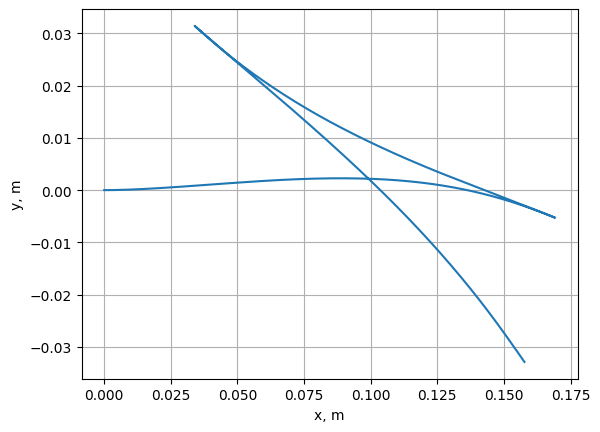

In [2]:
import rover_sympy
import numpy as np
import matplotlib.pyplot as plt

model = rover_sympy.Model()

def f_u(t):
    u = np.zeros(len(model.u))
    u[model.u_index['thr']] = np.sin(t)
    u[model.u_index['str']] = np.cos(t)
    return u

res = model.simulate(t0=0, tf=10, dt=0.01, f_u=f_u)

plt.figure()
plt.plot(res['x'][model.x_index['x'], :], res['x'][model.x_index['y'], :])
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.grid()
